<a href="https://colab.research.google.com/github/hayatosc/experiment-codes/blob/main/2025/0711/sankairi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

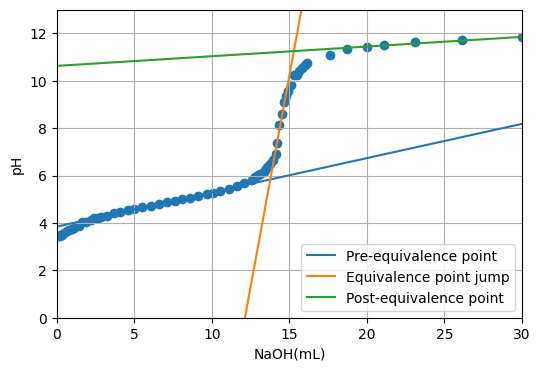

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# NaOHの滴下量 (mL) のリスト
Vb_data = np.array([
  0.00, 0.10, 0.20, 0.22, 0.30, 0.45, 0.65, 0.80, 0.95, 1.10,
  1.40, 1.65, 1.90, 2.20, 2.40, 2.63, 2.83, 3.20, 3.70, 4.10,
  4.60, 5.00, 5.50, 6.10, 6.60, 7.10, 7.60, 8.10, 8.60, 9.10,
  9.70, 10.10, 10.55, 11.10, 11.60, 12.10, 12.60, 12.70, 12.80, 13.00,
  13.13, 13.36, 13.41, 13.56, 13.74, 13.91, 14.11, 14.21, 14.36, 14.54,
  14.64, 14.81, 14.94, 15.11, 15.31, 15.46, 15.61, 15.81, 16.01, 16.16,
  17.61, 18.74, 20.01, 21.11, 23.11, 26.11, 30.01, 32.81
])

# 対応する測定pHのリスト
pH_data = np.array([
  3.43, 3.43, 3.45, 3.48, 3.50, 3.56, 3.65, 3.70, 3.74, 3.80,
  3.86, 4.02, 4.02, 4.14, 4.21, 4.21, 4.26, 4.31, 4.40, 4.46,
  4.53, 4.59, 4.66, 4.73, 4.80, 4.87, 4.93, 4.99, 5.05, 5.12,
  5.22, 5.27, 5.36, 5.44, 5.57, 5.68, 5.82, 5.90, 5.95, 6.01,
  6.07, 6.16, 6.25, 6.35, 6.50, 6.67, 6.92, 7.39, 8.12, 8.60,
  9.11, 9.36, 9.59, 9.83, 10.24, 10.26, 10.41, 10.55, 10.66, 10.75,
  11.08, 11.33, 11.43, 11.51, 11.63, 11.74, 11.86, 11.92
])

# それぞれの領域を指定

pre_scale = (Vb_data >= 2.63) & (Vb_data <= 12.10)
Vb_pre_scale = Vb_data[pre_scale]
pH_pre_scale = pH_data[pre_scale]

jump_scale = (Vb_data >= 14.11) & (Vb_data <= 14.81)
Vb_jump_scale = Vb_data[jump_scale]
pH_jump_scale = pH_data[jump_scale]

post_scale = (Vb_data >= 18.74) & (Vb_data <= 32.81)
Vb_post_scale = Vb_data[post_scale]
pH_post_scale = pH_data[post_scale]

# フィッティング

pre_fit = linregress(Vb_pre_scale, pH_pre_scale)
jump_fit = linregress(Vb_jump_scale, pH_jump_scale)
post_fit = linregress(Vb_post_scale, pH_post_scale)

# プロット範囲を広げるための新しいVbデータを作成
Vb_plot = np.linspace(0, 35, 100)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.scatter(Vb_data, pH_data)

# 広い範囲でフィッティングした直線を描画
ax.plot(Vb_plot, pre_fit.intercept + pre_fit.slope * Vb_plot, label='Pre-equivalence point')
ax.plot(Vb_plot, jump_fit.intercept + jump_fit.slope * Vb_plot, label='Equivalence point jump')
ax.plot(Vb_plot, post_fit.intercept + post_fit.slope * Vb_plot, label='Post-equivalence point')

ax.set_xlabel('NaOH(mL)')
ax.set_ylabel('pH')
ax.legend()
ax.set_xlim(0,30)
ax.set_ylim(0,13)
plt.grid(True)
plt.show()

In [2]:
intersect_pre_jump_x = (jump_fit.intercept - pre_fit.intercept) / (pre_fit.slope - jump_fit.slope)
intersect_pre_jump_y = pre_fit.slope * intersect_pre_jump_x + pre_fit.intercept

intersect_jump_post_x = (post_fit.intercept - jump_fit.intercept) / (jump_fit.slope - post_fit.slope)
intersect_jump_post_y = jump_fit.slope * intersect_jump_post_x + jump_fit.intercept

print(f"Intersection of pre and jump: ({intersect_pre_jump_x:.2f}, {intersect_pre_jump_y:.2f})")
print(f"Intersection of jump and post: ({intersect_jump_post_x:.2f}, {intersect_jump_post_y:.2f})")

Intersection of pre and jump: (13.77, 5.84)
Intersection of jump and post: (15.29, 11.25)


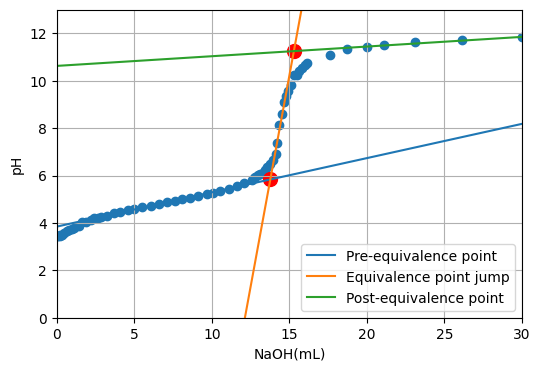

In [3]:
ax.scatter(intersect_pre_jump_x, intersect_pre_jump_y, color='red', s=100)
ax.scatter(intersect_jump_post_x, intersect_jump_post_y, color='red', s=100)
fig

Intersection of red line and jump line: (14.53, 8.54)
pKa value: 4.90


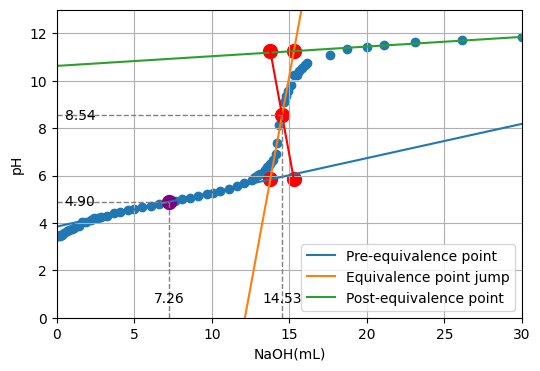

In [4]:
ax.scatter(intersect_pre_jump_x, intersect_jump_post_y, color='red', s=100)
ax.scatter(intersect_jump_post_x, intersect_pre_jump_y, color='red', s=100)

line_x = [intersect_pre_jump_x, intersect_jump_post_x]
line_y = [intersect_jump_post_y, intersect_pre_jump_y]
ax.plot(line_x, line_y, color='red')


red_line_slope = (line_y[1] - line_y[0]) / (line_x[1] - line_x[0])
red_line_intercept = line_y[0] - red_line_slope * line_x[0]
jump_slope = jump_fit.slope
jump_intercept = jump_fit.intercept

intersection_x = (red_line_intercept - jump_intercept) / (jump_slope - red_line_slope)
intersection_y = jump_slope * intersection_x + jump_intercept

ax.scatter(intersection_x, intersection_y, color='red', s=100)

print(f"Intersection of red line and jump line: ({intersection_x:.2f}, {intersection_y:.2f})")

half_intersection_x = intersection_x / 2
pka_value = pre_fit.slope * half_intersection_x + pre_fit.intercept

print(f"pKa value: {pka_value:.2f}")

ax.scatter(half_intersection_x, pka_value, color='purple', s=100)

ax.plot([intersection_x, intersection_x], [ax.get_ylim()[0], intersection_y], color='gray', linestyle='--', linewidth=1)
ax.plot([ax.get_xlim()[0], intersection_x], [intersection_y, intersection_y], color='gray', linestyle='--', linewidth=1)

ax.plot([half_intersection_x, half_intersection_x], [ax.get_ylim()[0], pka_value], color='gray', linestyle='--', linewidth=1)
ax.plot([ax.get_xlim()[0], half_intersection_x], [pka_value, pka_value], color='gray', linestyle='--', linewidth=1)

ax.text(intersection_x, ax.get_ylim()[0] + 0.5, f'{intersection_x:.2f}', ha='center', va='bottom', color='black')
ax.text(ax.get_xlim()[0] + 0.5, intersection_y, f'{intersection_y:.2f}', ha='left', va='center', color='black')
ax.text(half_intersection_x, ax.get_ylim()[0] + 0.5, f'{half_intersection_x:.2f}', ha='center', va='bottom', color='black')
ax.text(ax.get_xlim()[0] + 0.5, pka_value, f'{pka_value:.2f}', ha='left', va='center', color='black')

ax.legend()

fig